In [1]:
import json
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from helpers import plotOwners, plotNewOwners, remove0s

In [2]:
client = MongoClient('localhost', 27017)
db = client.steamspy

In [3]:
#creating new columns to be used for data and casting things as ints
data = pd.DataFrame(list(db.clean.find()))
data.drop(columns = "_id", inplace = True) #drop _id column
#making price column ints and making price of free games 0
data['price'] = data['price'].fillna(0)
data['price'] = data['price'].astype(int)
data['negative'] = data['negative'].astype(int)
data['positive'] = data['positive'].astype(int)
data['Like/Dislike Ratio'] = data['positive']/data['negative']
data = data[data['Genres'].apply(lambda x: 'Indie' in x)]
data = data[data.price != 0]
data['Owner Average'] = (data['llOwners'] + data['ulOwners'])/2
data['earnings'] = data['price'] * data['Owner Average']

In [4]:
action = data[data['Genres'].apply(lambda x: 'Action' in x)]
strategy = data[data['Genres'].apply(lambda x: 'Strategy' in x)]
rpg = data[data['Genres'].apply(lambda x: 'RPG' in x)]
adventure = data[data['Genres'].apply(lambda x: 'Adventure' in x)]
sports = data[data['Genres'].apply(lambda x: 'Sports' in x)]
simulation = data[data['Genres'].apply(lambda x: 'Simulation' in x)]
mmo = data[data['Genres'].apply(lambda x: 'MMO' in x)]
theGenres = [action, strategy, rpg, adventure, sports, simulation, mmo]
genreNames = ['Action', 'Strategy', 'RPG', 'Adventure', 'Sports',
              'Simulation', 'MMO']

In [5]:
def createEarningsDF(listOfDfs, names):
    count = []
    earnings = []
    for i in listOfDfs:
        count.append(i.shape[0])
        earnings.append(i['earnings'].sum()/100)
    df = pd.DataFrame({'Type':names,'Earnings':earnings, 'Count':count})
    df['earningsAvg'] = df['Earnings']/df['Count']
    return df

In [6]:
def plotEarnings(listOfDfs, names, horizontal = False,
                 rotation=0, title1 = "Total Earnings", title2 = "Average Earnings per Game"):
    
    df = createEarningsDF(listOfDfs, names)
    
    if horizontal:
        ax = df.plot.barh(x = 'Type',y = 'Earnings',rot=rotation, 
                     figsize = (20,10), title=title1, color = 'red') 
        ax.tick_params(axis = 'both', labelsize=15)
        ax.set_ylabel("USD", fontsize = 40)
        ax.title.set_size(40)
    
        ax = df.plot.barh(x = 'Type',y = 'earningsAvg', rot=rotation, figsize=(20,10), 
                     title = title2, color = 'blue')
        ax.tick_params(axis = 'both', labelsize=15)
        ax.set_ylabel("USD", fontsize = 40)
        ax.title.set_size(40)
    else:
        ax = df.plot.bar(x = 'Type',y = 'Earnings',rot=rotation, 
                     figsize = (20,10), title=title1) 
        ax.tick_params(axis = 'both', labelsize=15)
        ax.set_ylabel("USD", fontsize = 40)
        ax.title.set_size(40)
    
        ax = df.plot.bar(x = 'Type',y = 'earningsAvg', rot=rotation, figsize=(20,10), 
                     title = title2)
        ax.tick_params(axis = 'both', labelsize=15)
        ax.set_ylabel("USD", fontsize = 40)
        ax.title.set_size(40)

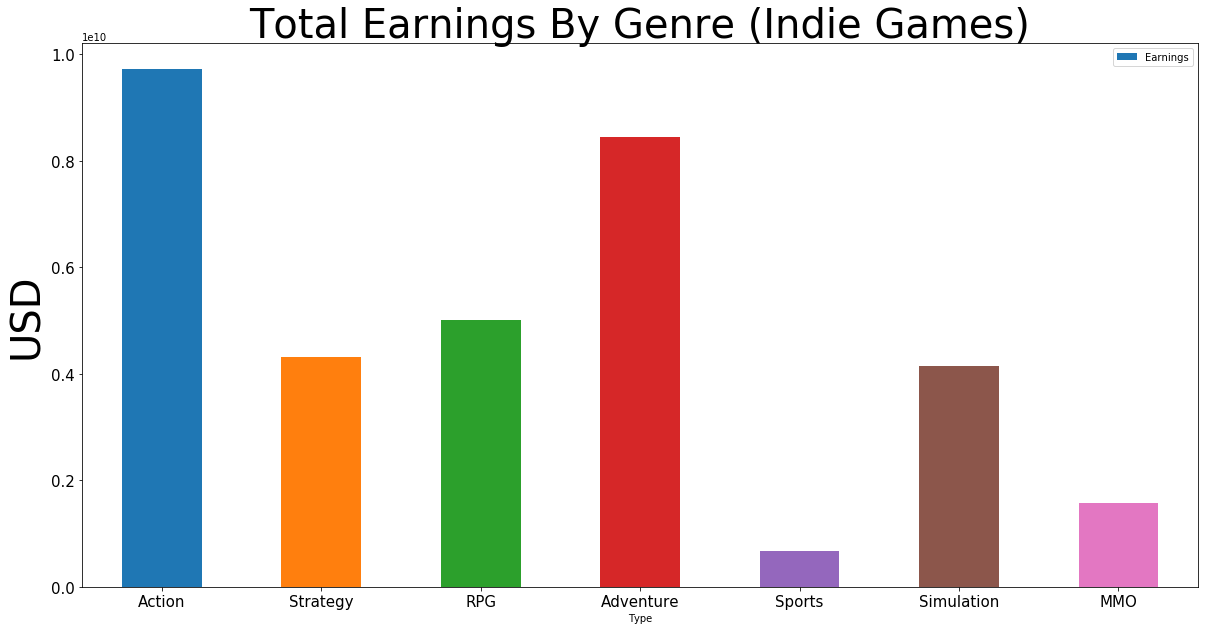

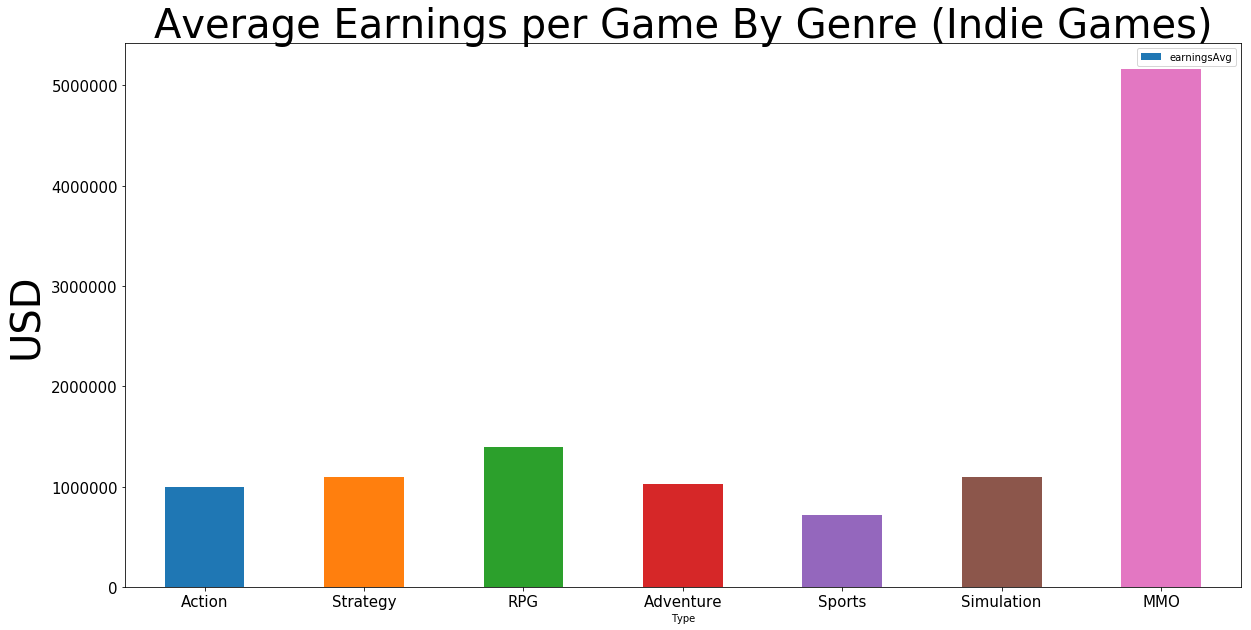

In [7]:
plotEarnings(theGenres, genreNames, title1 = "Total Earnings By Genre (Indie Games)", 
             title2 = "Average Earnings per Game By Genre (Indie Games)")

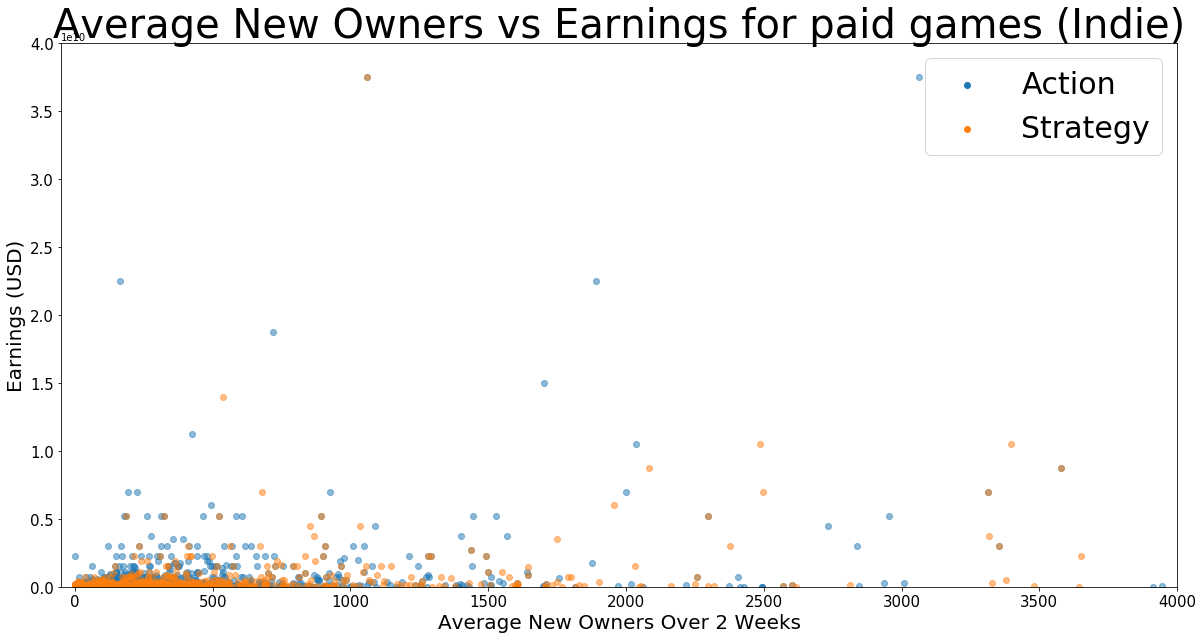

In [8]:
theGenres = [action, strategy]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['Action', 'Strategy']
#average new owners vs like/dislike for paid
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['earnings'], alpha=0.5)
plt.xlim(-50, 4000)
plt.ylim(-2, 40000000000)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Earnings for paid games (Indie)", fontsize=40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Earnings (USD)", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)

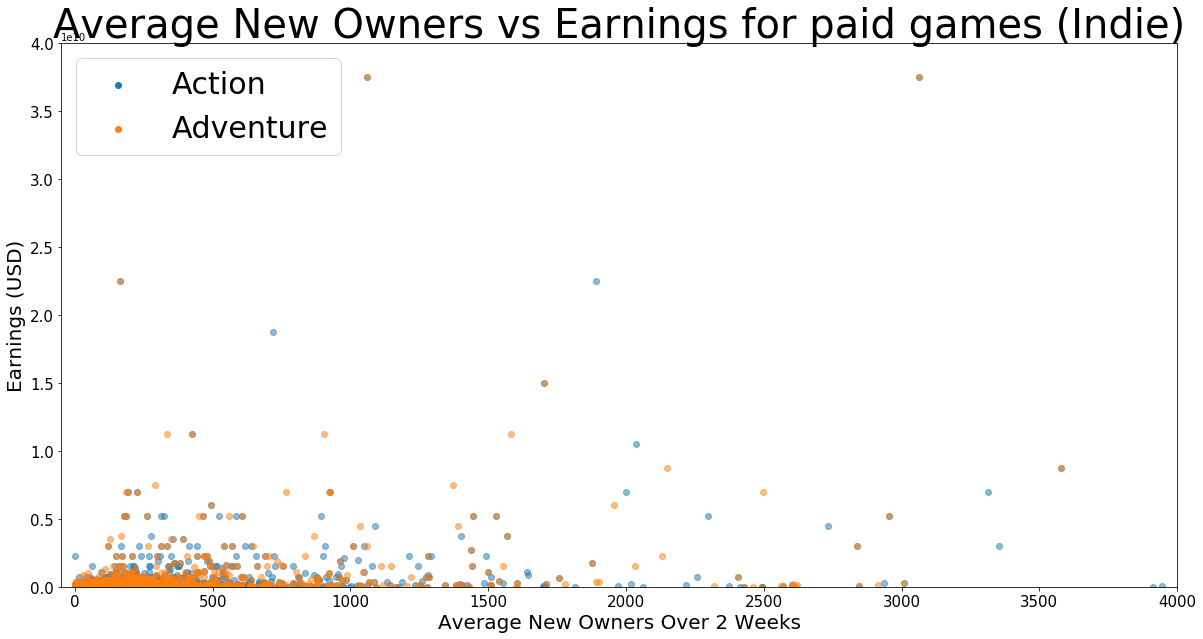

In [9]:
theGenres = [action, adventure]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['Action', 'Adventure']
#average new owners vs like/dislike for paid
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['earnings'], alpha=0.5)
plt.xlim(-50, 4000)
plt.ylim(-2, 40000000000)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Earnings for paid games (Indie)", fontsize=40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Earnings (USD)", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)

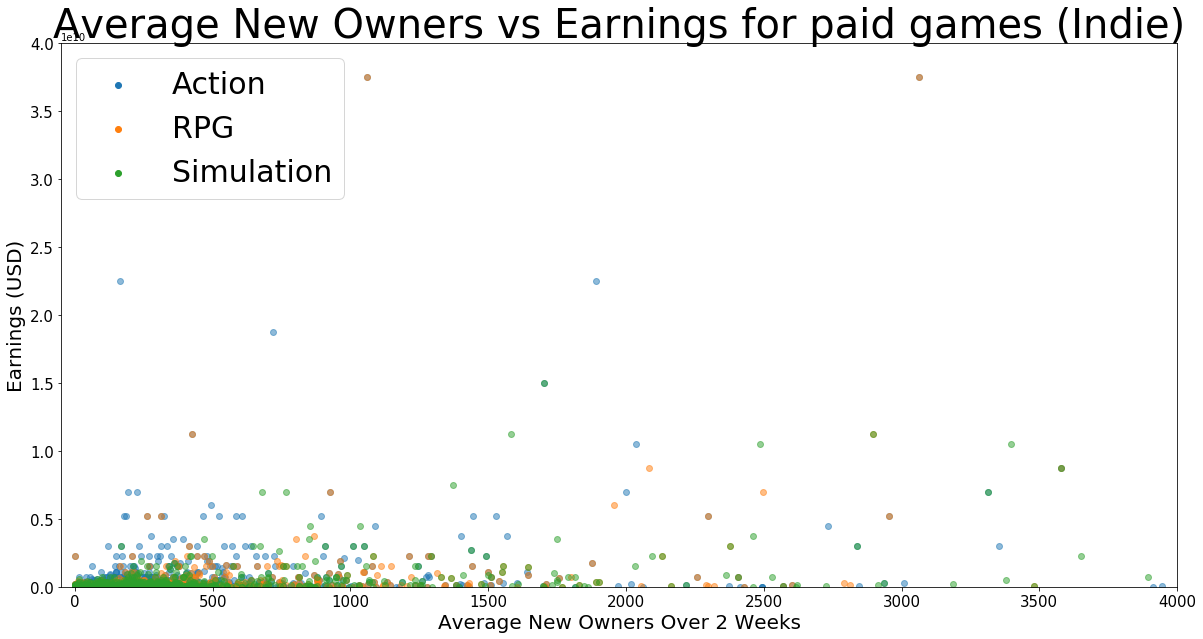

In [10]:
theGenres = [action, rpg, simulation]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['Action', 'RPG', 'Simulation']
#average new owners vs like/dislike for paid
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['earnings'], alpha=0.5)
plt.xlim(-50, 4000)
plt.ylim(-2, 40000000000)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Earnings for paid games (Indie)", fontsize=40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Earnings (USD)", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)

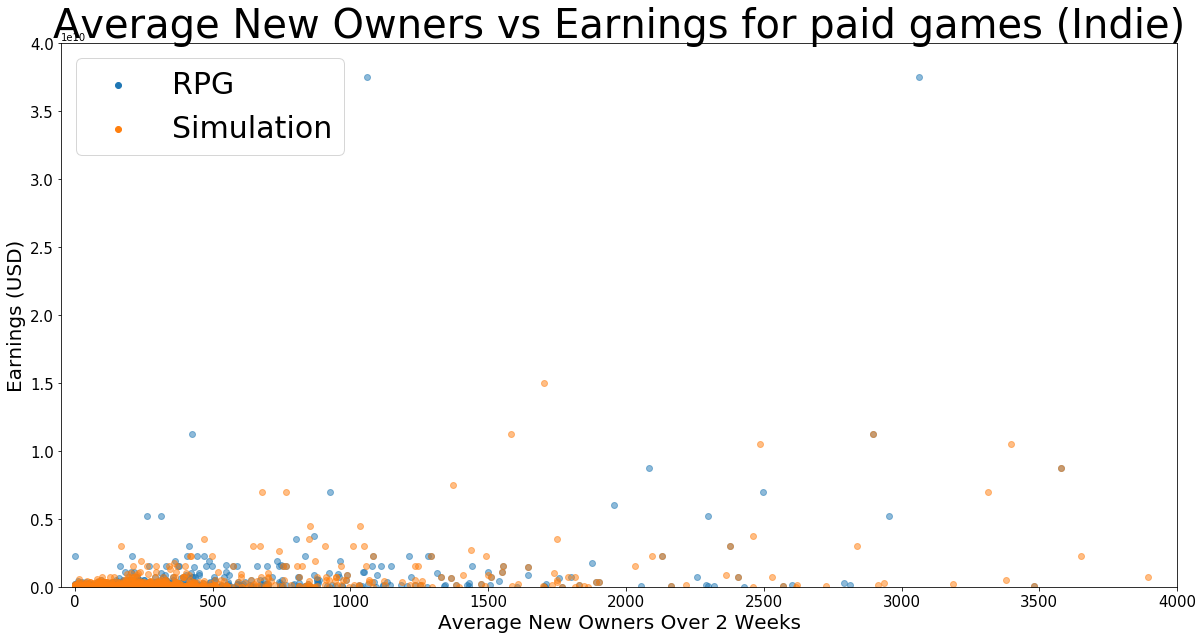

In [11]:
theGenres = [rpg, simulation]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['RPG', 'Simulation']
#average new owners vs like/dislike for paid
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['earnings'], alpha=0.5)
plt.xlim(-50, 4000)
plt.ylim(-2, 40000000000)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Earnings for paid games (Indie)", fontsize=40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Earnings (USD)", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)

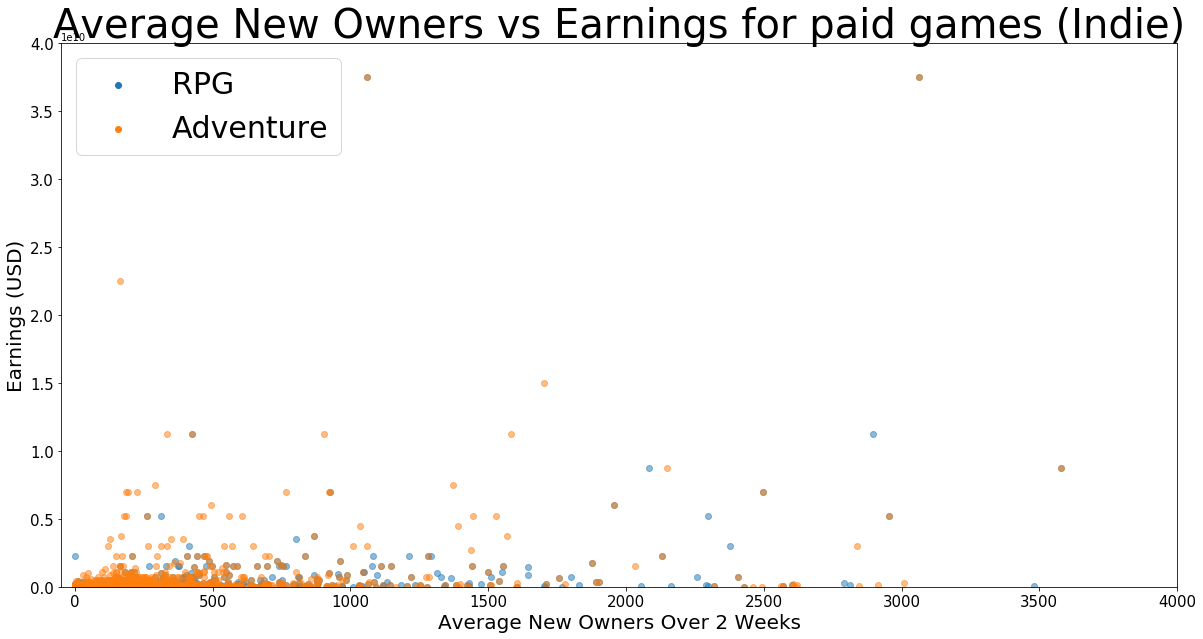

In [12]:
theGenres = [rpg, adventure]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['RPG', 'Adventure']
#average new owners vs like/dislike for paid
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['earnings'], alpha=0.5)
plt.xlim(-50, 4000)
plt.ylim(-2, 40000000000)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Earnings for paid games (Indie)", fontsize=40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Earnings (USD)", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)

In [13]:
casual = data[data['Tags'].apply(lambda x: 'Casual' in x)]
soundtrack = data[data['Tags'].apply(lambda x: 'Great+Soundtrack' in x)]
atmospheric = data[data['Tags'].apply(lambda x: 'Atmospheric' in x)]
twoD = data[data['Tags'].apply(lambda x: '2D' in x)]
puzzle = data[data['Tags'].apply(lambda x: 'Puzzle' in x)]
openWorld = data[data['Tags'].apply(lambda x: 'Open+World' in x)]
storyRich = data[data['Tags'].apply(lambda x: 'Story+Rich' in x)]
coop = data[data['Tags'].apply(lambda x: 'Co-op' in x)]
difficult = data[data['Tags'].apply(lambda x: 'Difficult' in x)]
shooter = data[data['Tags'].apply(lambda x: 'Shooter' in x)]
scifi = data[data['Tags'].apply(lambda x: 'Sci-fi' in x)]
firstPerson = data[data['Tags'].apply(lambda x: 'First-Person' in x)]
horror = data[data['Tags'].apply(lambda x: 'Horror' in x)]
vr = data[data['Tags'].apply(lambda x: 'VR' in x)]
anime = data[data['Tags'].apply(lambda x: 'Anime' in x)]
pixelGraphics = data[data['Tags'].apply(lambda x: 'Pixel+Graphics' in x)]
funny = data[data['Tags'].apply(lambda x: 'Funny' in x)]
fantasy = data[data['Tags'].apply(lambda x: 'Fantasy' in x)]
platformer = data[data['Tags'].apply(lambda x: 'Platformer' in x)]
femaleProtagonist = data[data['Tags'].apply(lambda x: 'Female+Protagonist' in x)]
fps = data[data['Tags'].apply(lambda x: 'FPS' in x)]
survival = data[data['Tags'].apply(lambda x: 'Survival' in x)]
gore = data[data['Tags'].apply(lambda x: 'Gore' in x)]
violent = data[data['Tags'].apply(lambda x: 'Violent' in x)]
sandbox = data[data['Tags'].apply(lambda x: 'Sandbox' in x)]
comedy = data[data['Tags'].apply(lambda x: 'Comedy' in x)]
arcade = data[data['Tags'].apply(lambda x: 'Arcade' in x)]
classic = data[data['Tags'].apply(lambda x: 'Classic' in x)]
nudity = data[data['Tags'].apply(lambda x: 'Nudity' in x)]
onlineCoop = data[data['Tags'].apply(lambda x: 'Online+Co-op' in x)]
tactical = data[data['Tags'].apply(lambda x: 'Tactical' in x)]
zombies = data[data['Tags'].apply(lambda x: 'Zombies' in x)]
teamBased = data[data['Tags'].apply(lambda x: 'Team-Based' in x)]
pve = data[data['Tags'].apply(lambda x: 'PvE' in x)]
pvp = data[data['Tags'].apply(lambda x: 'PvP' in x)]
war = data[data['Tags'].apply(lambda x: 'War' in x)]
controller = data[data['Tags'].apply(lambda x: 'Controller' in x)]

In [14]:
tags = [casual, soundtrack, atmospheric, twoD, puzzle, openWorld, storyRich, coop, difficult, shooter, scifi,
       firstPerson, horror, vr, anime, pixelGraphics, funny, fantasy, platformer, femaleProtagonist, fps, 
       survival, gore, violent, sandbox, comedy, arcade, classic, nudity, onlineCoop, tactical, zombies, teamBased,
       pve, pvp, war, controller]
tagNames = ['Casual', 'Great Soundtrack', 'Atmospheric', '2D', 'Puzzle', 'Open World', 'Story Rich', 'Co-op',
           'Difficult', 'Shooter', 'Sci-fi', 'First-Person', 'Horror', 'VR', 'Anime', 'Pixel Graphics', 'Funny',
           'Fantasy', 'Platformer', 'Female Protagonist', 'FPS', 'Survival', 'Gore', 'Violent', 'Sandbox', 'Comedy',
           'Arcade', 'Classic', 'Nudity', 'Online Co-op', 'Tactical', 'Zombies', 'Team-Based', 'PvE', 'PvP', 'War',
           'Controller']

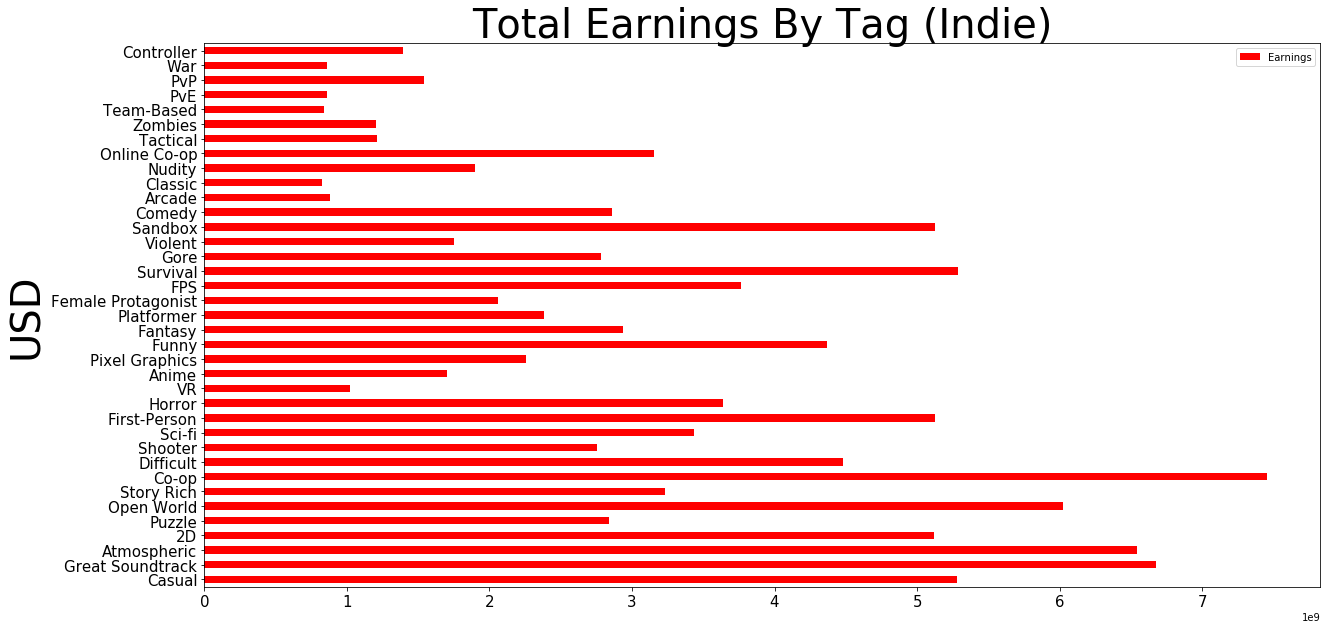

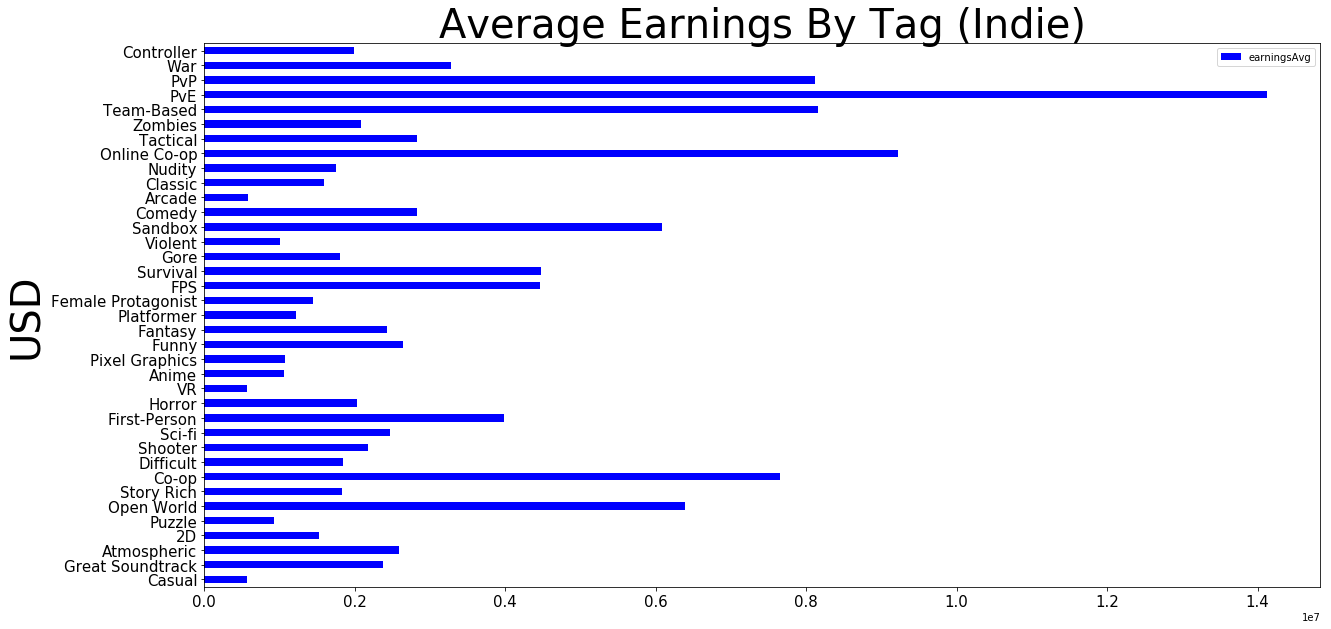

In [15]:
plotEarnings(tags, tagNames, horizontal = True, title1 = "Total Earnings By Tag (Indie)", 
             title2 = "Average Earnings By Tag (Indie)")